In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
batting_df = pd.read_csv('./core/Batting.csv')

In [10]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [6]:
batting_df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,109739.000000,108127.000000,86954.000000,110495.000000,108395.000000,73845.000000,107679.000000,104427.000000,74392.00000,85054.000000
mean,1968.051948,1.079624,50.605258,138.557084,18.397312,36.184117,6.177429,1.233893,2.859939,16.720664,2.893190,1.162431,12.787556,20.625038,1.040368,1.060810,2.168529,1.01480,2.874586
std,39.992877,0.288199,46.831714,183.317500,27.990668,52.066687,9.613576,2.580559,6.386896,26.187532,7.564655,2.662906,20.555314,28.724308,2.688349,2.299942,4.129955,1.92328,4.658673
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1938.000000,1.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1977.000000,1.000000,34.000000,45.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2002.000000,1.000000,78.000000,222.000000,26.000000,55.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.00000,4.000000
max,2021.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.00000,36.000000


In [7]:
batting_df.isna().sum()

playerID        0
yearID          0
stint           0
teamID          0
lgID          737
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI           756
SB           2368
CS          23541
BB              0
SO           2100
IBB         36650
HBP          2816
SH           6068
SF          36103
GIDP        25441
dtype: int64

In [31]:
modern_era = batting_df[batting_df['yearID'] > 1920]
modern_era

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
18667,acostjo01,1921,1,WS1,AL,33,30,2,2,0,...,0.0,1.0,0.0,6,14.0,NaN,0.0,1.0,NaN,NaN
18668,adamsba01,1921,1,PIT,NL,25,63,7,16,2,...,6.0,1.0,0.0,1,7.0,NaN,0.0,2.0,NaN,NaN
18669,ainsmed01,1921,1,DET,AL,35,98,6,27,5,...,12.0,1.0,0.0,13,7.0,NaN,0.0,4.0,NaN,NaN
18670,ainsmed01,1921,2,SLN,NL,27,62,5,18,0,...,5.0,0.0,0.0,3,4.0,NaN,0.0,1.0,NaN,NaN
18671,alexape01,1921,1,CHN,NL,31,95,8,29,3,...,14.0,0.0,1.0,2,13.0,NaN,0.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110490,zimmejo02,2021,1,MIL,NL,2,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
110491,zimmeky01,2021,1,KCA,AL,52,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,46.0,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0
110493,zuberty01,2021,1,KCA,AL,31,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
modern_era.isna().sum()


playerID        0
yearID          0
stint           0
teamID          0
lgID            0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS           6736
BB              0
SO              0
IBB         18137
HBP             0
SH              0
SF          17588
GIDP         7661
dtype: int64

In [45]:
modern_era = modern_era.fillna(0)

In [46]:
modern_era.isna().sum()


playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
BOT         0
dtype: int64

In [71]:
modern_era = modern_era[modern_era['AB'] > 100]

In [62]:
def calculate_bot(ab, h, _2b, _3b, hr, r, sb, cs, bb, hbp, rbi, sh, sf, gidp):
    bot = ((h - (_2b + _3b + hr)) + ( 2* _2b) + (3 * _3b) + (4 * hr) + (sb - cs) + (rbi - hr) + (r - hr) + bb + hbp + sh + sf - gidp) / (ab * 1.00)
    return bot

In [86]:
def calculate_trc(bot, ab, bb, hbp):
    return (bot * (ab + bb + hbp)) / 4.00


In [72]:
player_bot = modern_era.apply(lambda s:  calculate_bot(s['AB'], s['H'], s['2B'], s['3B'], s['HR'], s['R'], s['SB'], s['CS'], s['BB'] + s['IBB'], s['HBP'], s['RBI'], s['SH'], s['SF'], s['GIDP']), axis=1)

In [64]:
player_bot


18667     0.400000
18668     0.682540
18669     0.734694
18670     0.548387
18671     0.663158
            ...   
110489    0.000000
110490    0.000000
110492    0.682353
110493    0.000000
110494    0.843844
Length: 74002, dtype: float64

In [73]:
modern_era.drop('BOT', axis=1)
modern_era['BOT'] = player_bot

C:\Users\c3a1r\AppData\Local\Temp/ipykernel_29484/2084261284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_era['BOT'] = player_bot


In [74]:
modern_era

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT
18678,bakerfr01,1921,1,NYA,AL,94,330,46,97,16,...,8.0,5.0,26,12.0,0.0,4.0,9.0,0.0,0.0,0.863636
18679,bancrda01,1921,1,NY1,NL,153,606,121,193,26,...,17.0,10.0,66,23.0,0.0,4.0,22.0,0.0,0.0,0.894389
18680,barbawa01,1921,1,BSN,NL,134,550,66,166,22,...,11.0,4.0,24,28.0,0.0,0.0,26.0,0.0,0.0,0.680000
18681,barbetu01,1921,1,CHN,NL,127,452,73,142,14,...,5.0,9.0,41,24.0,0.0,6.0,14.0,0.0,0.0,0.772124
18684,barnhcl01,1921,1,PIT,NL,124,449,66,116,15,...,3.0,3.0,32,36.0,0.0,3.0,21.0,0.0,0.0,0.766147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110478,yastrmi01,2021,1,SFN,NL,139,468,75,105,28,...,4.0,0.0,51,131.0,4.0,9.0,1.0,3.0,3.0,0.809829
110479,yelicch01,2021,1,MIL,NL,117,399,70,99,19,...,9.0,3.0,70,113.0,5.0,3.0,0.0,3.0,5.0,0.837093
110488,zimmebr01,2021,1,CLE,AL,99,299,44,68,9,...,15.0,3.0,30,122.0,0.0,15.0,0.0,4.0,3.0,0.749164
110492,zimmery01,2021,1,WAS,NL,110,255,27,62,16,...,0.0,0.0,16,77.0,0.0,0.0,0.0,2.0,9.0,0.682353


In [67]:
pyb = modern_era[['playerID', 'yearID', 'BOT']]

In [75]:
modern_era.sort_values('BOT', ascending=False)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT
84776,bondsba01,2004,1,SFN,NL,147,373,129,135,27,...,6.0,1.0,232,41.0,120.0,9.0,0.0,3.0,5.0,2.163539
82096,bondsba01,2002,1,SFN,NL,143,403,117,149,31,...,9.0,2.0,198,47.0,68.0,9.0,0.0,2.0,4.0,1.828784
83424,bondsba01,2003,1,SFN,NL,130,390,111,133,22,...,7.0,0.0,148,58.0,61.0,10.0,0.0,2.0,7.0,1.600000
80767,bondsba01,2001,1,SFN,NL,153,476,129,156,32,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,1.594538
19053,ruthba01,1921,1,NYA,AL,152,540,177,204,44,...,17.0,13.0,145,81.0,0.0,4.0,4.0,0.0,0.0,1.562963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82072,benjami01,2002,1,PIT,NL,108,120,7,18,2,...,0.0,4.0,7,31.0,0.0,1.0,1.0,1.0,5.0,0.275000
47907,perryga01,1969,1,SFN,NL,40,117,5,14,1,...,0.0,0.0,4,47.0,0.0,1.0,7.0,0.0,3.0,0.273504
43087,koufasa01,1963,1,LAN,NL,40,110,3,7,0,...,0.0,0.0,6,51.0,0.0,0.0,7.0,1.0,2.0,0.272727
102021,josepca01,2016,1,BAL,AL,49,132,7,23,3,...,0.0,0.0,7,28.0,0.0,0.0,2.0,0.0,6.0,0.272727


<AxesSubplot:>

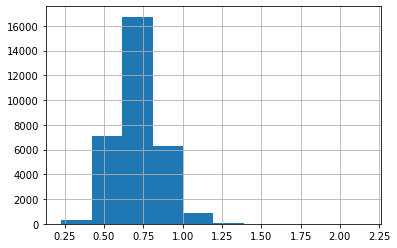

In [77]:
modern_era['BOT'].hist()

In [79]:
high_bot = modern_era[modern_era['BOT'] > 0.75]
high_bot.sort_values('BOT', ascending=False)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT
84776,bondsba01,2004,1,SFN,NL,147,373,129,135,27,...,6.0,1.0,232,41.0,120.0,9.0,0.0,3.0,5.0,2.163539
82096,bondsba01,2002,1,SFN,NL,143,403,117,149,31,...,9.0,2.0,198,47.0,68.0,9.0,0.0,2.0,4.0,1.828784
83424,bondsba01,2003,1,SFN,NL,130,390,111,133,22,...,7.0,0.0,148,58.0,61.0,10.0,0.0,2.0,7.0,1.600000
80767,bondsba01,2001,1,SFN,NL,153,476,129,156,32,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,1.594538
19053,ruthba01,1921,1,NYA,AL,152,540,177,204,44,...,17.0,13.0,145,81.0,0.0,4.0,4.0,0.0,0.0,1.562963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60240,wilsowi02,1982,1,KCA,AL,136,585,87,194,19,...,37.0,11.0,26,81.0,2.0,6.0,2.0,2.0,4.0,0.750427
26832,lewisbu01,1936,1,WS1,AL,143,601,100,175,21,...,6.0,6.0,47,46.0,0.0,4.0,5.0,0.0,0.0,0.750416
50084,brocklo01,1972,1,SLN,NL,153,621,81,193,26,...,63.0,18.0,47,93.0,12.0,1.0,3.0,3.0,6.0,0.750403
23373,sislege01,1929,1,BSN,NL,154,629,67,205,40,...,6.0,0.0,33,17.0,0.0,4.0,20.0,0.0,0.0,0.750397


<AxesSubplot:>

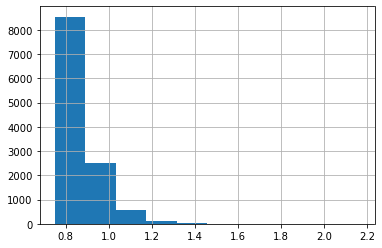

In [80]:
high_bot['BOT'].hist()

In [82]:
print(high_bot)

         playerID  yearID  stint teamID lgID    G   AB    R    H  2B  ...  \
18678   bakerfr01    1921      1    NYA   AL   94  330   46   97  16  ...   
18679   bancrda01    1921      1    NY1   NL  153  606  121  193  26  ...   
18681   barbetu01    1921      1    CHN   NL  127  452   73  142  14  ...   
18684   barnhcl01    1921      1    PIT   NL  124  449   66  116  15  ...   
18686   bassljo01    1921      1    DET   AL  119  388   37  119  18  ...   
...           ...     ...    ...    ...  ...  ...  ...  ...  ...  ..  ...   
110455  wisdopa01    2021      1    CHN   NL  106  338   54   78  13  ...   
110463   wongko01    2021      1    MIL   NL  116  445   70  121  32  ...   
110478  yastrmi01    2021      1    SFN   NL  139  468   75  105  28  ...   
110479  yelicch01    2021      1    MIL   NL  117  399   70   99  19  ...   
110494  zuninmi01    2021      1    TBA   AL  109  333   64   72  11  ...   

          SB    CS  BB     SO  IBB   HBP    SH   SF  GIDP       BOT  
18678

In [90]:
recent = high_bot[high_bot['yearID'] > 2014]

In [91]:
recent.sort_values('BOT', ascending=False)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT
108582,sotoju01,2020,1,WAS,NL,47,154,39,54,14,...,6.0,2.0,41,28.0,12.0,1.0,0.0,0.0,1.0,1.389610
107830,freemfr01,2020,1,ATL,NL,60,214,51,73,23,...,2.0,0.0,45,37.0,7.0,3.0,0.0,0.0,6.0,1.242991
107287,troutmi01,2019,1,LAA,AL,134,470,110,137,27,...,11.0,2.0,110,120.0,14.0,16.0,0.0,4.0,5.0,1.223404
105722,troutmi01,2018,1,LAA,AL,140,471,101,147,24,...,24.0,2.0,122,124.0,25.0,10.0,0.0,4.0,5.0,1.222930
104195,troutmi01,2017,1,LAA,AL,114,402,92,123,25,...,22.0,4.0,94,90.0,15.0,7.0,0.0,4.0,8.0,1.196517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103047,casteni01,2017,1,DET,AL,157,614,73,167,36,...,4.0,5.0,41,142.0,0.0,5.0,0.0,5.0,12.0,0.750814
104212,utleych01,2017,1,LAN,NL,127,309,43,73,20,...,6.0,1.0,32,57.0,0.0,9.0,1.0,2.0,3.0,0.750809
101379,alvarpe01,2016,1,BAL,AL,109,337,43,84,20,...,1.0,0.0,37,97.0,1.0,0.0,0.0,2.0,6.0,0.750742
109171,diazya01,2021,1,TBA,AL,134,465,62,119,20,...,1.0,1.0,69,85.0,4.0,3.0,0.0,4.0,11.0,0.750538


C:\Users\c3a1r\AppData\Local\Temp/ipykernel_29484/2688302995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['TRC'] = player_trc


<AxesSubplot:>

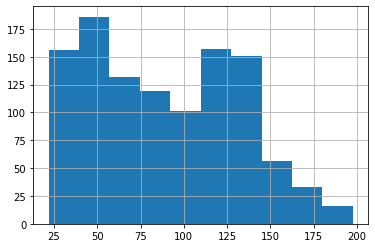

In [94]:
player_trc = recent.apply(lambda s: calculate_trc(s['BOT'], s['AB'], s['BB'] + s['IBB'], s['HBP']), axis=1)
recent['TRC'] = player_trc
recent['TRC'].hist()

In [95]:
recent.sort_values('TRC', ascending=False)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT,TRC
104245,vottojo01,2017,1,CIN,NL,162,559,106,179,34,...,1.0,134,83.0,20.0,8.0,0.0,6.0,16.0,1.096601,197.662343
100360,goldspa01,2015,1,ARI,NL,159,567,103,182,38,...,5.0,118,151.0,29.0,2.0,0.0,7.0,16.0,1.104056,197.626102
102712,troutmi01,2016,1,LAA,AL,159,549,123,173,32,...,7.0,116,137.0,12.0,11.0,0.0,5.0,5.0,1.145719,197.063752
103525,judgeaa01,2017,1,NYA,AL,155,542,128,154,24,...,4.0,127,208.0,11.0,5.0,0.0,4.0,15.0,1.134686,194.315037
100437,harpebr03,2015,1,WAS,NL,153,521,118,172,38,...,4.0,124,131.0,15.0,5.0,0.0,4.0,15.0,1.163148,193.373321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109878,nootbla01,2021,1,SLN,NL,58,109,15,26,3,...,1.0,13,28.0,1.0,0.0,1.0,1.0,0.0,0.761468,23.415138
102883,aokino01,2017,3,NYN,NL,27,102,16,29,7,...,0.0,13,10.0,0.0,1.0,0.0,0.0,1.0,0.784314,22.745098
100079,casalcu01,2015,1,TBA,AL,38,101,13,24,6,...,0.0,8,34.0,0.0,2.0,1.0,1.0,2.0,0.801980,22.254950
103323,gentrcr01,2017,1,BAL,AL,77,101,17,26,5,...,4.0,11,24.0,0.0,1.0,3.0,1.0,1.0,0.782178,22.096535


In [96]:
recent.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,BOT,TRC
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.00000,1107.000000,1107.000000,...,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.00000,1107.000000,1107.000000,1107.000000
mean,2018.116531,1.056007,107.137308,371.289070,59.700090,101.463415,21.175248,2.04336,18.194219,57.928636,...,2.057814,43.372177,89.551039,2.803071,4.915989,0.578139,3.02710,7.525745,0.844015,89.528360
std,1.962111,0.241543,41.409623,166.668509,28.842599,48.967008,10.977043,2.14946,10.853339,29.002983,...,2.391270,24.678341,42.751964,3.690204,4.471852,1.414211,2.43044,5.393387,0.083761,42.591333
min,2015.000000,1.000000,27.000000,101.000000,12.000000,22.000000,2.000000,0.00000,0.000000,5.000000,...,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.750476,21.886792
25%,2016.000000,1.000000,64.500000,209.500000,34.000000,55.000000,12.000000,0.00000,9.000000,33.000000,...,0.000000,24.000000,53.000000,0.000000,2.000000,0.000000,1.00000,3.000000,0.782481,50.271247
50%,2018.000000,1.000000,114.000000,380.000000,57.000000,100.000000,20.000000,1.00000,16.000000,56.000000,...,1.000000,38.000000,87.000000,2.000000,4.000000,0.000000,3.00000,6.000000,0.821369,87.155718
75%,2020.000000,1.000000,146.000000,530.000000,83.000000,144.000000,30.000000,3.00000,26.000000,81.000000,...,3.000000,59.000000,121.000000,4.000000,7.000000,0.500000,4.00000,11.000000,0.881618,125.145141
max,2021.000000,3.000000,162.000000,681.000000,137.000000,216.000000,56.000000,14.00000,59.000000,133.000000,...,18.000000,145.000000,219.000000,29.000000,30.000000,13.000000,15.00000,28.000000,1.389610,197.662343
